In [1]:
from libs.util import *
from libs.dynamic import *

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/financial-industry.csv')

In [3]:
number_of_nodes = 8
offset = 0
exclude = [17,19,20,27,28,42]

matrix = []
for row in df.values[950:]:
    prow = []
    for i, x in enumerate(row):
        if i not in exclude:
            prow.append(x/1000/1000)
    matrix.append(np.array(prow[1+offset:offset+number_of_nodes+1]))
matrix = np.array(matrix)
    
train_size = int(len(matrix) * 0.96)
train = matrix[:train_size] 
future = matrix[train_size:]
print(len(matrix), len(train), len(future))

247 237 10


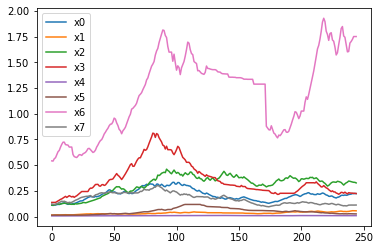

In [4]:
plot_flow(matrix)

In [5]:
import pysindy as ps

dt = 0.001

model = ps.SINDy()
model.fit(train, t=dt)
model.print()

x0' = 62.769 1 + 585.374 x0 + 1266.653 x1 + -818.016 x2 + -666.070 x3 + -22111.404 x4 + 4256.491 x5 + 67.903 x6 + 552.654 x7 + -3337.281 x0^2 + 17034.999 x0 x1 + 1967.901 x0 x2 + 1868.159 x0 x3 + -133452.503 x0 x4 + -1485.479 x0 x5 + -267.709 x0 x6 + 2198.950 x0 x7 + -67097.786 x1^2 + 1616.922 x1 x2 + -12243.289 x1 x3 + -5326.014 x1 x5 + 3991.949 x1 x6 + -4827.626 x1 x7 + -65.256 x2^2 + 165.077 x2 x3 + 157559.027 x2 x4 + -5132.925 x2 x5 + -404.865 x2 x6 + -1701.556 x2 x7 + -508.734 x3^2 + 104547.561 x3 x4 + -2119.711 x3 x5 + 217.864 x3 x6 + -217.738 x3 x7 + -446728.394 x4 x5 + -12086.781 x4 x6 + 9542.716 x5^2 + 829.245 x5 x6 + 4080.006 x5 x7 + -21.267 x6^2 + 84.352 x6 x7 + -1120.067 x7^2
x1' = 0.055 1 + 6.095 x0 + 144.221 x1 + 2.529 x2 + 2.481 x3 + -19.913 x4 + -128.666 x5 + -1.411 x6 + -12.225 x7 + -1239.221 x0 x1 + 19.140 x0 x2 + 648.939 x0 x5 + -70.875 x0 x6 + 349.806 x0 x7 + -148.182 x1 x2 + 185.833 x1 x6 + 62.631 x2^2 + -24.714 x2 x3 + 43.359 x2 x5 + -14.205 x2 x6 + -80.921 x2 x7 

In [13]:
x_test = generate_data(model, train[0], dt)
steady_state = find_steady_state(x_test)
print('steady_state:', steady_state)

steady_state: [0. 0. 0. 0. 0. 0. 0. 0.]


In [14]:
# perturbed = create_perturbed_state(2, 8, steady_state)
perturbed = future[0]
x_perturbed = apply_perturbation(model, perturbed, sindy, dt)
perturbed_steady_state = find_steady_state(x_perturbed)
print('perturbed_steady_state:', perturbed_steady_state)

perturbed_steady_state: [0. 0. 0. 0. 0. 0. 0. 0.]


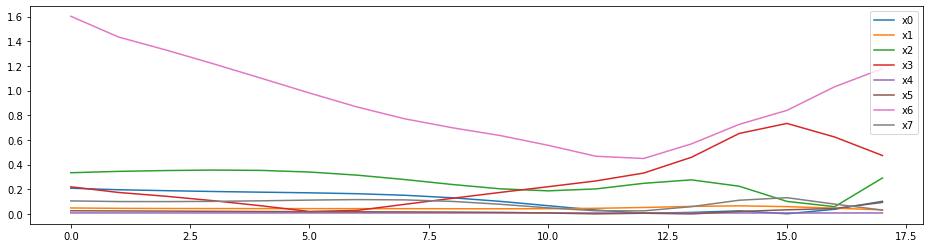

In [15]:
x_flow = flow(x_perturbed, start=1, stop=19)
plot_flow(x_flow, 'single')

<Figure size 1152x648 with 0 Axes>

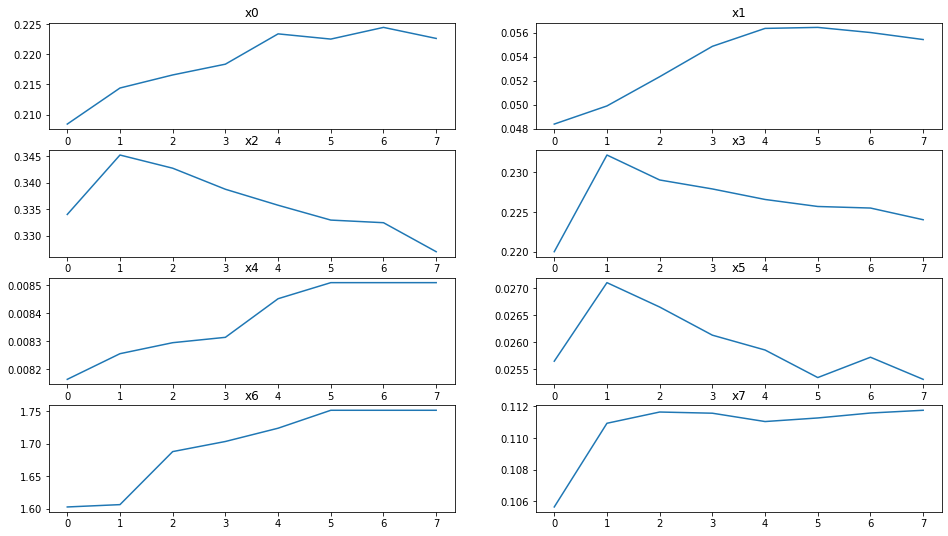

In [16]:
plot_flow(future, 'multi')

[0.0, 0.046704222150698436, 0.0796412863474221, 0.10778454286867008, 0.13351840627886735, 0.15662476593046978, 0.17629293117264763, 0.19068425076085044, nan]


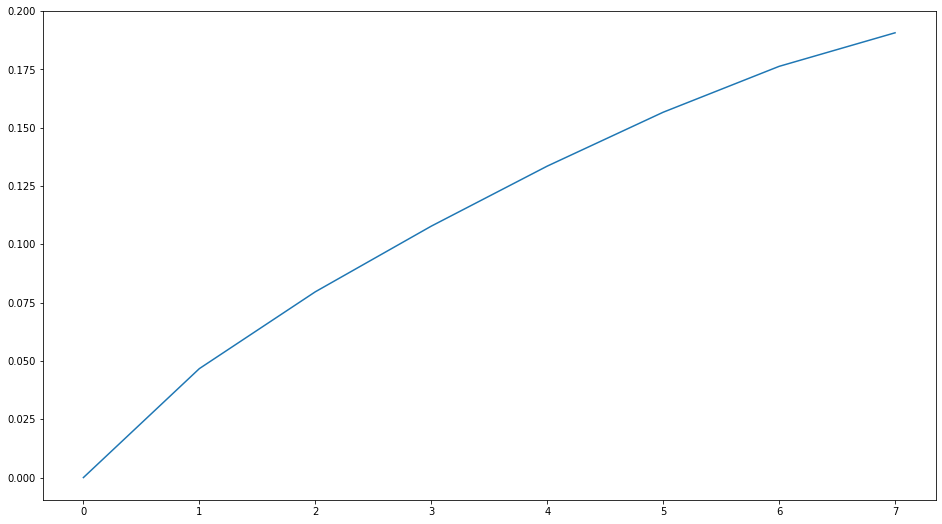

In [17]:
prediction_error_matrix = [flow_prediction_error(x_flow, future, i) for i in range(1,10)]
prediction_error = [sum(error)/number_of_nodes for error in prediction_error_matrix]

#print(prediction_error_matrix)
print(prediction_error)
plt.figure(2)
plt.plot(prediction_error)

In [ ]:
g_matrix = calculate_g(future[0], steady_state, sindy, dt)

g_dist = find_matrix_dist(g_matrix)
plt.rcParams["figure.figsize"] = (16, 4)
plt.figure(2)
plt.hist(g_dist)
plt.show()

f = calculate_f(g_matrix)
print(f)

In [ ]:
calculate_logf(f, [7]*8)